#Project MNIST Alphabets Prediction

### Connecting Gdrive to Colab

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/project_cv/mnist.zip

# Importing Required Packages and Reading the extracted images

In [3]:
from PIL import Image, ImageOps
import numpy as np
import os
from tqdm import tqdm
import pandas as pd

# Importing Packages for Visualization
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
img = Image.open("/content/New_folder/A/A-0.png")

In [ ]:
img.size


(28, 28)

In [ ]:
img2 = Image.open("/content/New_folder/F/F-1025.png")
img2.size


(28, 28)

In [ ]:
data = []
labels = []
for i in os.listdir("/content/New_folder"):
    subdirectory = "/content/New_folder/" + i
    for j in tqdm(os.listdir(subdirectory), desc=f"Processing {i}"):
        filepath = subdirectory + "/" + j
        img = Image.open(filepath)
        img = img.resize((28,28)).convert("L")
        img = np.array(img).flatten().tolist()
        data.append(img)
        labels.append(i)
dat = np.asarray(data)

Processing H: 100%|██████████| 7218/7218 [00:02<00:00, 3464.96it/s]


###Converting the data into DataFrame and saving as csv file to Drive

In [ ]:
input= pd.DataFrame(dat).astype("uint8")
output = pd.DataFrame(labels,columns=["Labels"])

In [ ]:
input.to_csv("input.csv")
output.to_csv("output.csv")

In [ ]:
df = input.merge(output,left_index=True,right_index=True)

In [ ]:
# Converting the np array to image to show the image

In [ ]:
img_2=np.asarray(input.iloc[0:1])

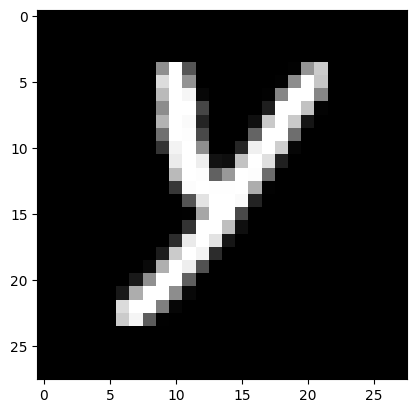

In [ ]:
img_shape = (28, 28) 
img = np.reshape(img_2, img_shape)

plt.imshow(img, cmap='gray')
plt.show()


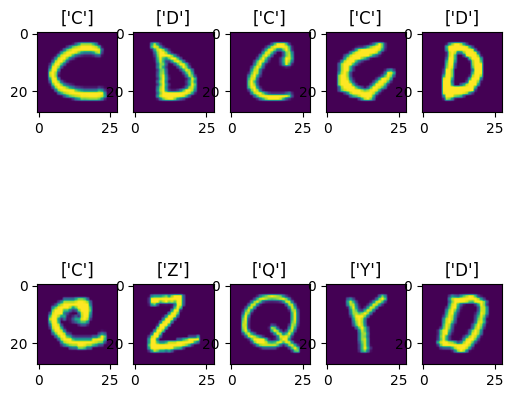

In [ ]:
random_n = np.random.randint(0,70000, size=(10,))
plt.figure(figsize=(6,6))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.title(str((output.values[random_n[i-1]])))
    plt.imshow(input.iloc[random_n[i-1]].values.reshape(28,28))

#Data Analysis

In [ ]:
# Data Analysis
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Y
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Y
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Y
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Y
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Y


In [ ]:
count = df.groupby(["Labels"]).size().reset_index(name = "count")


In [ ]:
count

,Labels,count
0,A,13870
1,B,8668
2,C,23409
3,D,10134
4,E,11440
5,F,1163
6,G,5762
7,H,7218
8,I,1120
9,J,8493


In [ ]:
# Plotting Bar graph for count of letters
fig = px.bar(x=count["Labels"], y=count["count"],color=count["Labels"],hover_name=count["count"],width=700, height=400,\
            labels={'x':'Labels',"y":"count"})
fig.show()

In [ ]:
# From the above plot it is seen that the data is unbalanced 
# O has the highest frequency with 57825
# I has the least frequency with 1120 

### Reading Input and Output data from CSV

In [6]:
input = pd.read_csv("/content/gdrive/MyDrive/MNIST/input.csv").drop(["Unnamed: 0"],axis=1).astype("uint8")
output = pd.read_csv("/content/gdrive/MyDrive/MNIST/output.csv").drop(["Unnamed: 0"],axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Splitting data into train and test for training the models

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(input,output,test_size=0.3,random_state=20)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
34794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y_train.dtypes

Labels    object
dtype: object

## Installing cuml , cudf to train the models on GPU

In [ ]:
# Installing cuml package in oreder to train the models on gpu for faster output
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

In [ ]:
!pip uninstall -y pyarrow
!pip install pyarrow

In [2]:
import cupy as cp

import cuml

In [13]:
le = LabelEncoder()

In [14]:
# converting Output columns to numeric using Labelencoder for training model in cuml
Y_train_le = le.fit_transform(np.asarray(Y_train).ravel())
Y_test_le = le.fit_transform(np.asarray(Y_test).ravel())
#Y_train_decoded = le.inverse_transform(Y_train_le)
#Y_test_decoded = le.inverse_transform(Y_test_le)


In [15]:
# Converting  the data to cupy arrays for training models faster
X_train_gpu = cp.array(X_train)
X_test_gpu = cp.array(X_test)

X_train_cpu = cp.asnumpy(X_train_gpu)
X_test_cpu = cp.asnumpy(X_test_gpu)

# Training Model using KNN Algorithm


In [ ]:
# Importing KNN classifier from cuml library
from cuml.neighbors import KNeighborsClassifier as cuKNeighbors

In [12]:
# Importing Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
knn_cuml = cuKNeighbors()

In [ ]:
knn_cuml.fit(X_train,Y_train_le)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn_cuml.predict(X_test)

In [ ]:
y_knn_acc = accuracy_score(Y_test_le,y_pred_knn)*100
y_knn_acc

95.68984033793943

In [20]:
y_label = sorted(Y_train["Labels"].unique().tolist())

In [ ]:
print(classification_report(Y_test_le,y_pred_knn,target_names=y_label))

              precision    recall  f1-score   support

           A       0.94      0.97      0.96      4169
           B       0.98      0.86      0.91      2715
           C       0.94      0.98      0.96      7049
           D       0.94      0.87      0.90      3008
           E       0.98      0.91      0.94      3348
           F       0.96      0.90      0.93       386
           G       0.97      0.86      0.91      1718
           H       0.93      0.91      0.92      2204
           I       0.97      0.88      0.92       338
           J       0.93      0.91      0.92      2565
           K       0.94      0.91      0.92      1681
           L       0.92      0.98      0.95      3564
           M       0.98      0.96      0.97      3662
           N       0.95      0.98      0.96      5649
           O       0.95      0.99      0.97     17282
           P       0.90      0.98      0.94      5802
           Q       0.97      0.74      0.84      1757
           R       0.98    

In [ ]:
cm_knn = confusion_matrix(Y_test_le, y_pred_knn)
pd.crosstab(Y_test_le,y_pred_knn,rownames=["Real"],colnames=["pred"])

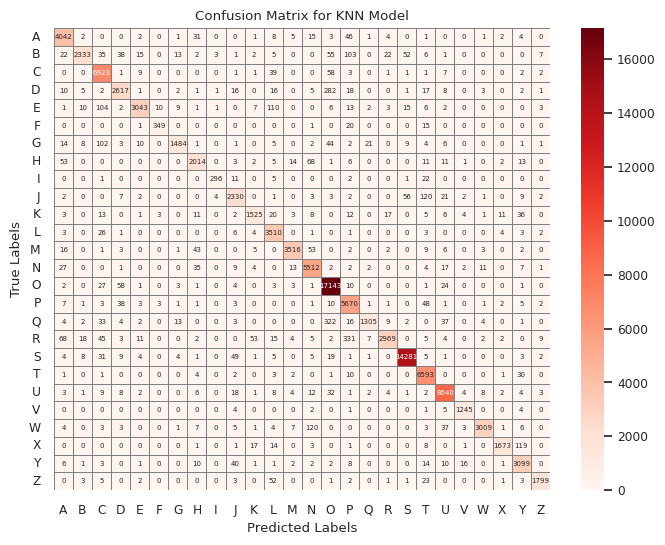

In [ ]:
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)
sns.heatmap(cm_knn, xticklabels=y_label, yticklabels=y_label,cmap=   'Reds',linecolor='grey', linewidths=0.5,annot=True,fmt="d",annot_kws={"fontsize":5})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.yticks(rotation=0)
plt.title('Confusion Matrix for KNN Model')
plt.show()

### Training Model Using DecisionTree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_gpu = DecisionTreeClassifier()
dt_gpu.fit(X_train_cpu,Y_train)


DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt_gpu.predict(X_test_cpu)

In [ ]:
dt_acc = accuracy_score(Y_test,y_pred_dt)*100
dt_acc

94.0359418629627

In [ ]:
print(classification_report(Y_test,y_pred_dt,target_names=y_label))


              precision    recall  f1-score   support

           A       0.91      0.91      0.91      4169
           B       0.88      0.86      0.87      2715
           C       0.96      0.97      0.96      7049
           D       0.89      0.89      0.89      3008
           E       0.91      0.91      0.91      3348
           F       0.90      0.79      0.84       386
           G       0.86      0.87      0.86      1718
           H       0.87      0.86      0.87      2204
           I       0.90      0.80      0.85       338
           J       0.90      0.91      0.90      2565
           K       0.88      0.88      0.88      1681
           L       0.95      0.96      0.96      3564
           M       0.92      0.87      0.90      3662
           N       0.93      0.94      0.93      5649
           O       0.97      0.98      0.97     17282
           P       0.96      0.97      0.96      5802
           Q       0.87      0.82      0.85      1757
           R       0.91    

In [ ]:
cm_dt = confusion_matrix(Y_test, y_pred_dt)

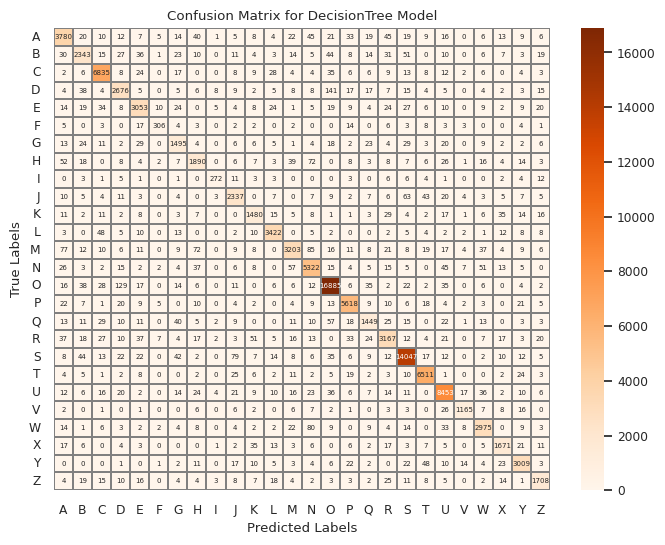

In [ ]:
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)
sns.heatmap(cm_dt, xticklabels=y_label, yticklabels=y_label,cmap= "Oranges",linecolor='grey', linewidths=0.05,annot=True,fmt="d",annot_kws={"fontsize":5})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.yticks(rotation=0)
plt.title('Confusion Matrix for DecisionTree Model')
plt.show()

## Training Model Using RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_gpu = RandomForestClassifier()
rf_gpu.fit(X_train_cpu,np.asarray(Y_train).ravel())


RandomForestClassifier()

In [ ]:

y_pred_rf = rf_gpu.predict(X_test_cpu)


In [ ]:
rf_gpu_acc = accuracy_score(Y_test,y_pred_rf)*100
rf_gpu_acc

98.31030285673373

In [ ]:
print(classification_report(Y_test,y_pred_rf,target_names=y_label))


              precision    recall  f1-score   support

           A       0.97      0.99      0.98      4169
           B       0.98      0.94      0.96      2715
           C       0.98      0.99      0.99      7049
           D       0.97      0.95      0.96      3008
           E       0.99      0.97      0.98      3348
           F       0.99      0.91      0.95       386
           G       0.98      0.94      0.96      1718
           H       0.98      0.94      0.96      2204
           I       1.00      0.94      0.97       338
           J       0.98      0.97      0.97      2565
           K       0.98      0.96      0.97      1681
           L       0.99      0.99      0.99      3564
           M       0.98      0.97      0.98      3662
           N       0.97      0.99      0.98      5649
           O       0.98      1.00      0.99     17282
           P       0.98      0.99      0.99      5802
           Q       0.98      0.92      0.95      1757
           R       0.98    

In [ ]:
cm_rf = confusion_matrix(Y_test, y_pred_rf)


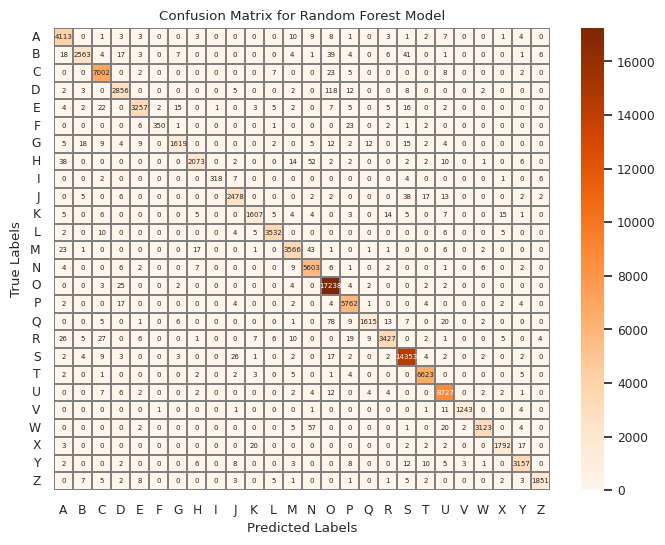

In [ ]:
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)
sns.heatmap(cm_rf, xticklabels=y_label, yticklabels=y_label,cmap= "Oranges",linecolor='grey', linewidths=0.05,annot=True,fmt="d",annot_kws={"fontsize":5})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.yticks(rotation=0)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Training Model using Logistic Regression

In [9]:
from cuml.linear_model import LogisticRegression as lgr

In [10]:
lr = lgr(multi_class="ovr")

[I] [09:39:58.183300] Unused keyword parameter: multi_class during cuML estimator initialization


In [16]:
lr.fit(X_train_cpu.astype("float32"),Y_train_le)


[W] [09:42:03.657662] L-BFGS: max iterations reached
[W] [09:42:03.659707] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.


LogisticRegression()

In [17]:
y_pred_lr = lr.predict(X_test)

In [48]:
lr_acc = accuracy_score(Y_test_le,y_pred_lr)*100
lr_acc

87.82308298131309

In [21]:
print(classification_report(Y_test_le,y_pred_lr,target_names=y_label))


              precision    recall  f1-score   support

           A       0.83      0.85      0.84      4169
           B       0.86      0.78      0.82      2715
           C       0.91      0.91      0.91      7049
           D       0.81      0.78      0.79      3008
           E       0.82      0.81      0.82      3348
           F       0.91      0.85      0.88       386
           G       0.84      0.76      0.80      1718
           H       0.76      0.70      0.73      2204
           I       0.88      0.82      0.85       338
           J       0.79      0.73      0.76      2565
           K       0.77      0.78      0.77      1681
           L       0.92      0.95      0.94      3564
           M       0.86      0.88      0.87      3662
           N       0.81      0.82      0.81      5649
           O       0.92      0.96      0.94     17282
           P       0.90      0.92      0.91      5802
           Q       0.85      0.75      0.80      1757
           R       0.82    

In [22]:
cm_lr = confusion_matrix(Y_test_le, y_pred_lr)


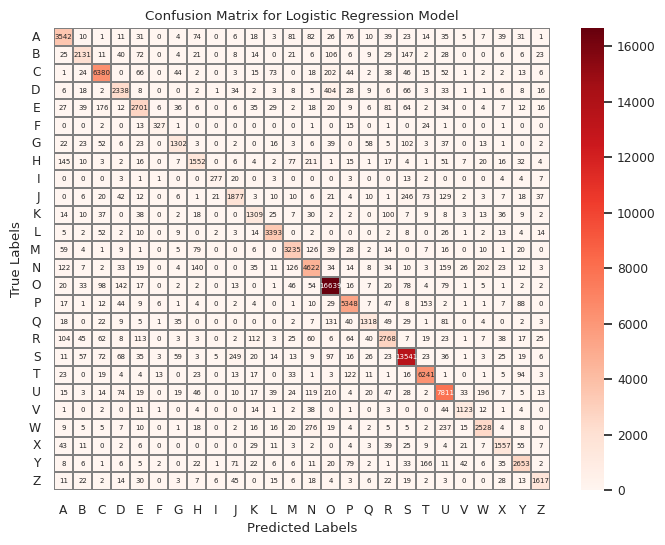

In [24]:
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)
sns.heatmap(cm_lr, xticklabels=y_label, yticklabels=y_label,cmap= "Reds",linecolor='grey', linewidths=0.05,annot=True,fmt="d",annot_kws={"fontsize":5})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.yticks(rotation=0)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

## Training Model using Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb = MultinomialNB()

In [28]:
nb.fit(X_train,np.asarray(Y_train).ravel())

MultinomialNB()

In [30]:
y_pred_nb = nb.predict(X_test)

In [31]:
nb_acc = accuracy_score(Y_test,y_pred_nb)*100
nb_acc

70.02756497458294

In [33]:
cm_nb = confusion_matrix(Y_test, y_pred_nb)


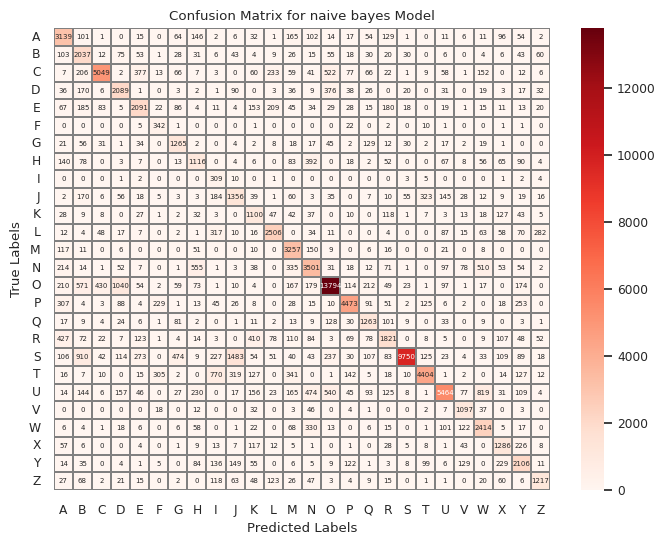

In [46]:
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)
sns.heatmap(cm_nb, xticklabels=y_label, yticklabels=y_label,cmap= "Reds",linecolor='grey', linewidths=0.05,annot=True,fmt="d",annot_kws={"fontsize":5})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.yticks(rotation=0)
plt.title('Confusion Matrix for naive bayes Model')
plt.show()

## Training Model using SVM

In [36]:
from cuml import SVC

In [37]:
svm= SVC()

In [38]:
svm.fit(X_train.astype("float32"),Y_train_le)

SVC()

In [39]:
svm_pred=svm.predict(X_test)

In [40]:
svm_acc = accuracy_score(Y_test_le,svm_pred)*100
svm_acc

97.97558530822653

In [41]:
print(classification_report(Y_test_le,svm_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4169
           1       0.98      0.96      0.97      2715
           2       0.98      0.98      0.98      7049
           3       0.94      0.95      0.94      3008
           4       0.98      0.97      0.97      3348
           5       0.98      0.96      0.97       386
           6       0.98      0.94      0.96      1718
           7       0.98      0.93      0.95      2204
           8       1.00      0.93      0.97       338
           9       0.96      0.96      0.96      2565
          10       0.96      0.95      0.95      1681
          11       0.98      0.99      0.98      3564
          12       0.98      0.98      0.98      3662
          13       0.97      0.98      0.98      5649
          14       0.98      0.99      0.99     17282
          15       0.98      0.99      0.99      5802
          16       0.97      0.93      0.95      1757
          17       0.98    

In [44]:
cm_rf = confusion_matrix(Y_test_le, svm_pred)

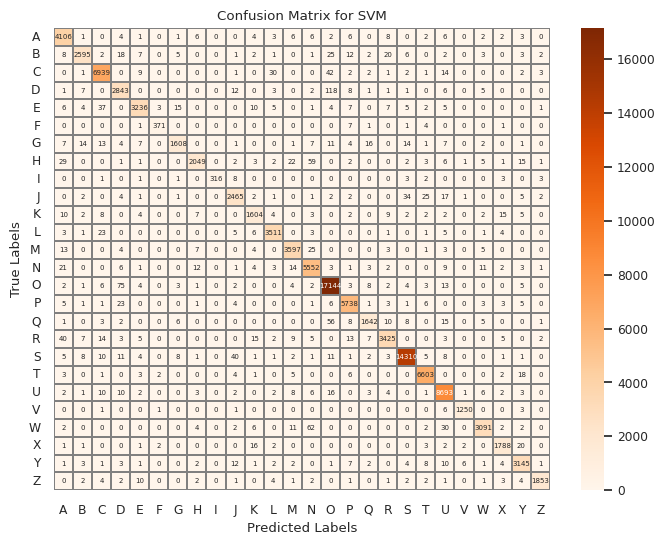

In [45]:
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)
sns.heatmap(cm_rf, xticklabels=y_label, yticklabels=y_label,cmap= "Oranges",linecolor='grey', linewidths=0.05,annot=True,fmt="d",annot_kws={"fontsize":5})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.yticks(rotation=0)
plt.title('Confusion Matrix for SVM')
plt.show()

In [68]:
 Best_Algo = {"Algorithm": ["KNN classifier"," DT Classifier","Randomforest classifier","LogisticRegression", "Naive Bayes Classifier",
                            "SVm"],
           "Classification": ["KNN","Decision-Tree","Ensemble","Lr","multinomialNB",'SVC'],
           "Accuracy": [95.68984033793943,94.0359418629627,98.31030285673373,87.82308298131309,70.02756497458294,97.97558530822653]}

In [69]:
df=pd.DataFrame(Best_Algo)

In [70]:
df

,Algorithm,Classification,Accuracy
0,KNN classifier,KNN,95.689840
1,DT Classifier,Decision-Tree,94.035942
2,Randomforest classifier,Ensemble,98.310303
3,LogisticRegression,Lr,87.823083
4,Naive Bayes Classifier,multinomialNB,70.027565
5,SVm,SVC,97.975585


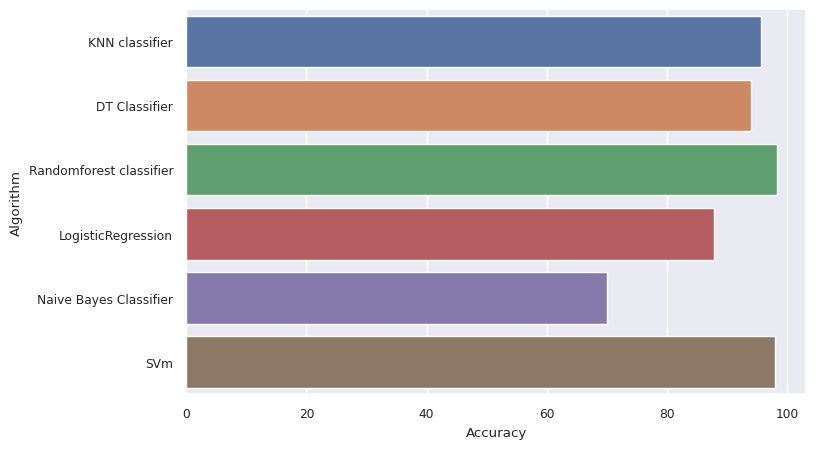

In [72]:
plt.figure(figsize=(8,5))
sns.barplot( x = 'Accuracy',y ='Algorithm' , data = df,orient ='h');

#The results of the evaluation using Accuracy as the metric show that Random-Forest-Regression outperformed the other models, with a score of 98
#SVM had the second-best performance, with a score of 97

